In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import pyfolio as pf
from extract_returns import extract_returns

In [2]:
results = pd.read_pickle('results_strategy_2a_1998-2018.pickle')
results.tail()

,algo_volatility,algorithm_period_return,alpha,atr,benchmark_period_return,benchmark_volatility,beta,capital_used,correlations,ending_cash,...,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,target,trading_days,transactions,treasury_period_return
2018-10-25 20:00:00+00:00,0.246924,87.218375,0.267049,AD 0.006392 BO 0.459300 BP 0.01...,3.043690,0.193013,-0.241183,1.948536e+06,PA 0.5 BO 0.5 RU 0.5 MP 0.5 CD ...,8.821838e+08,...,0.0,11,1.427942,8.802352e+08,-2.561038e+10,0.0,Future(27425 [EHX18]) -0.223272 Future(2774...,5239,"[{'amount': -2350, 'order_id': '43ceca434a6143...",0.0
2018-10-26 20:00:00+00:00,0.247033,84.048204,0.264985,AD 0.006402 BO 0.458650 BP 0.01...,2.972572,0.193035,-0.240229,-3.170171e+07,PA 0.5 SI 0.5 BO 0.5 RU 0.5 MP ...,8.504820e+08,...,0.0,13,1.416310,8.821838e+08,-2.594448e+10,0.0,Future(27586 [NGZ18]) 0.191011 Future(2774...,5240,"[{'amount': 5157, 'order_id': '7e446eb1d68e4ff...",0.0
2018-10-29 20:00:00+00:00,0.247011,84.444228,0.265095,AD 0.006392 BO 0.458150 BP 0.01...,2.950563,0.193021,-0.240246,3.960237e+06,PA 0.5 SI 0.5 BO 0.5 RU 0.5 MP ...,8.544423e+08,...,0.0,11,1.417472,8.504820e+08,-2.628657e+10,0.0,Future(27586 [NGZ18]) 0.191534 Future(2774...,5241,"[{'amount': 15577, 'order_id': 'd8f50d033ecc4c...",0.0
2018-10-30 20:00:00+00:00,0.246995,85.283255,0.265668,AD 0.006387 BO 0.456250 BP 0.01...,3.009104,0.193028,-0.240016,8.390272e+06,MP 0.5 PL 0.5 CL 0.5 AD 0.5 CD ...,8.628325e+08,...,0.0,11,1.420071,8.544423e+08,-2.340007e+10,0.0,Future(27586 [NGZ18]) 0.191385 Future(2774...,5242,[],0.0
2018-10-31 20:00:00+00:00,0.247005,86.973062,0.266658,AD 0.006362 BO 0.455700 BP 0.01...,3.051925,0.193023,-0.239735,1.689808e+07,PA 0.5 PL 0.5 CL 0.5 AD 0.5 CD ...,8.797306e+08,...,0.0,12,1.425388,8.628325e+08,-2.339168e+10,0.0,Future(27586 [NGZ18]) 0.193567 Future(2774...,5243,"[{'amount': -570, 'order_id': '061745d098444d1...",0.0


In [3]:
returns, positions, transactions = extract_returns(results)

In [4]:
def save_to_files(resulsts, positions, transactions):
    results.to_csv('results.csv')
    returns.to_csv('returns.csv')
    transactions.to_csv('transactions.csv')
    positions.to_csv('positions.csv')
save_to_files(results, positions, transactions)

In [5]:
# generate sector dictionary for every symbol
pos = list(positions.columns)
pos.remove('cash')
sectors = pd.read_csv('../bundles/meta.csv', usecols=['root_symbol', 'sector', 'sub_sector'], index_col=['root_symbol'])
sectors['sector'] = sectors['sector'].str.cat(sectors['sub_sector'], sep='/')
del sectors['sub_sector']
sectors.index = sectors.index.map(lambda x: x if len(x) > 1 else '_' + x)
sectors = sectors.T.to_dict(orient='records')[0]
sector_map = {p: sectors[p.root_symbol] for p in pos}

In [6]:
out_of_sample=results.index[-21]
transactions_mod = transactions.copy()
transactions_mod.price = transactions.sid.apply(lambda x: x.multiplier) * transactions.price
benchmark = (results['benchmark_period_return'] + 1).pct_change()[1:]
benchmark.index = benchmark.index.normalize()

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,48.30,2006-05-11,2007-08-10,2008-01-22,444
1,36.29,2015-01-30,2017-08-10,2018-01-24,779
2,29.64,2008-03-17,2008-09-22,2008-10-10,150
3,24.94,2011-08-09,2013-10-10,2014-02-28,669
4,22.95,2009-12-01,2010-05-27,2010-09-28,216


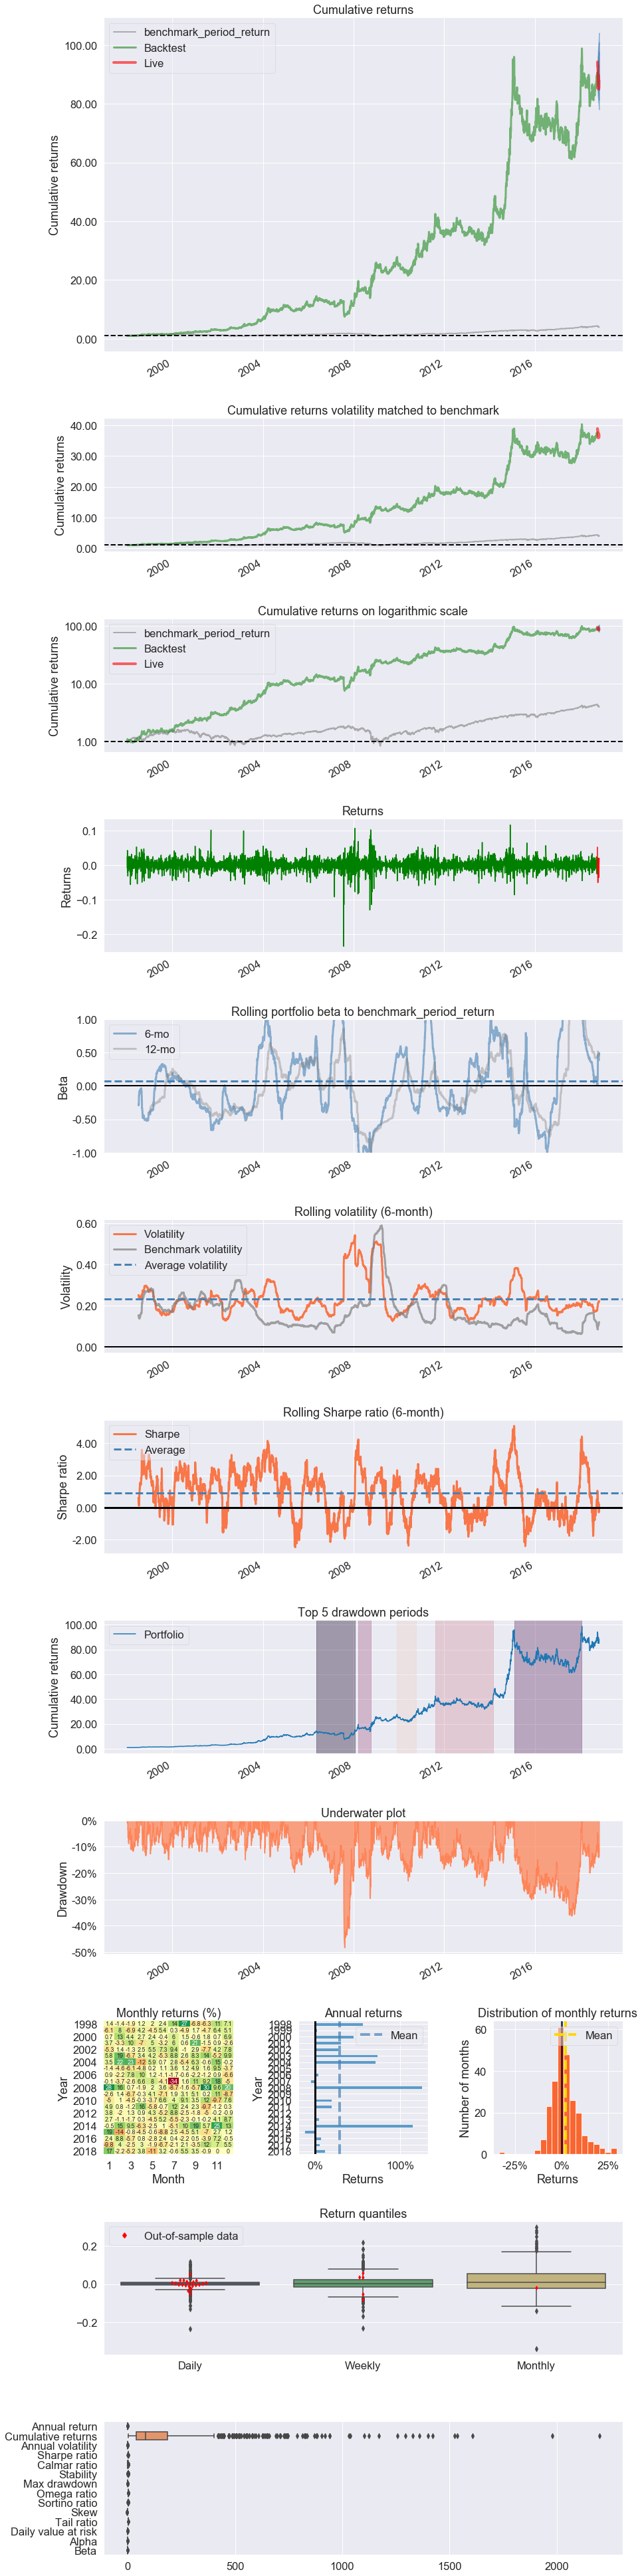

Stress Events,mean,min,max
Dotcom,0.16%,-3.62%,3.30%
Lehmann,-0.10%,-13.04%,8.68%
9/11,0.45%,-3.27%,10.09%
US downgrade/European Debt Crisis,0.09%,-5.79%,5.78%
Fukushima,0.43%,-2.29%,2.69%
US Housing,0.59%,-1.90%,3.32%
EZB IR Event,-0.26%,-2.33%,1.60%
Aug07,0.09%,-3.23%,4.94%
Mar08,-0.05%,-8.39%,6.82%
Sept08,-0.13%,-13.04%,8.68%


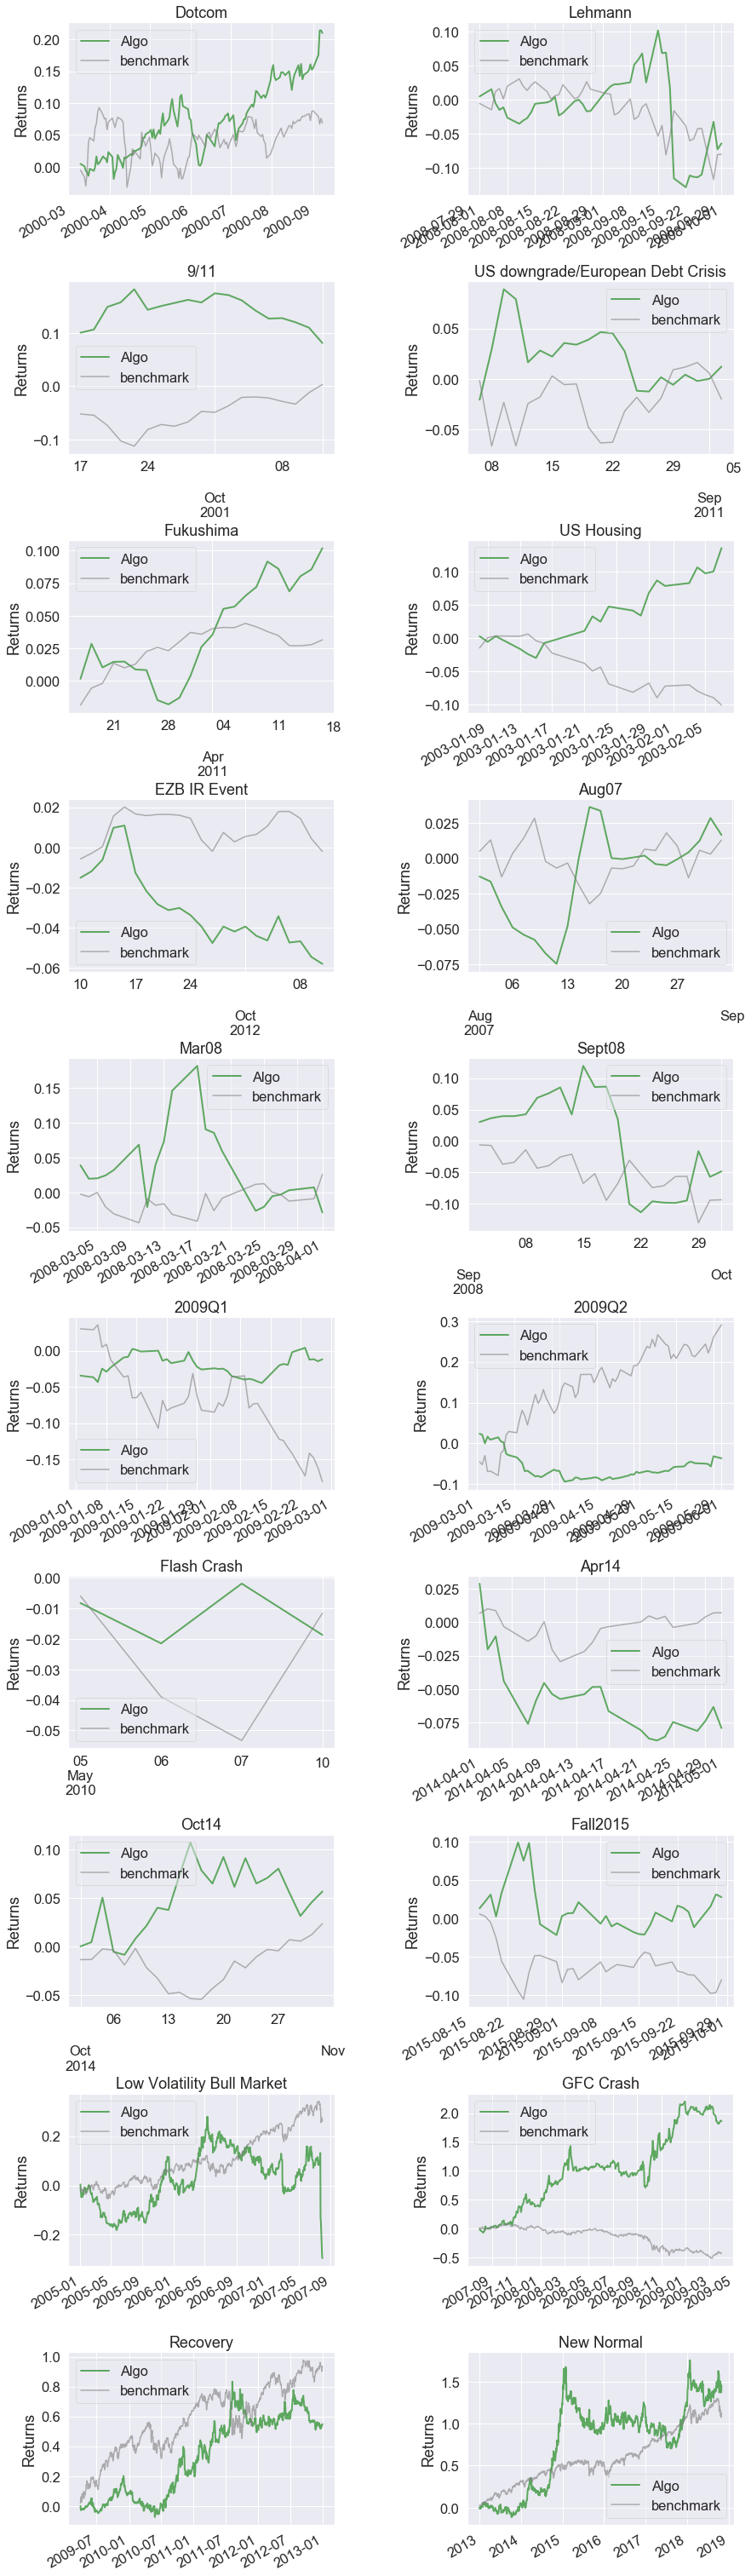

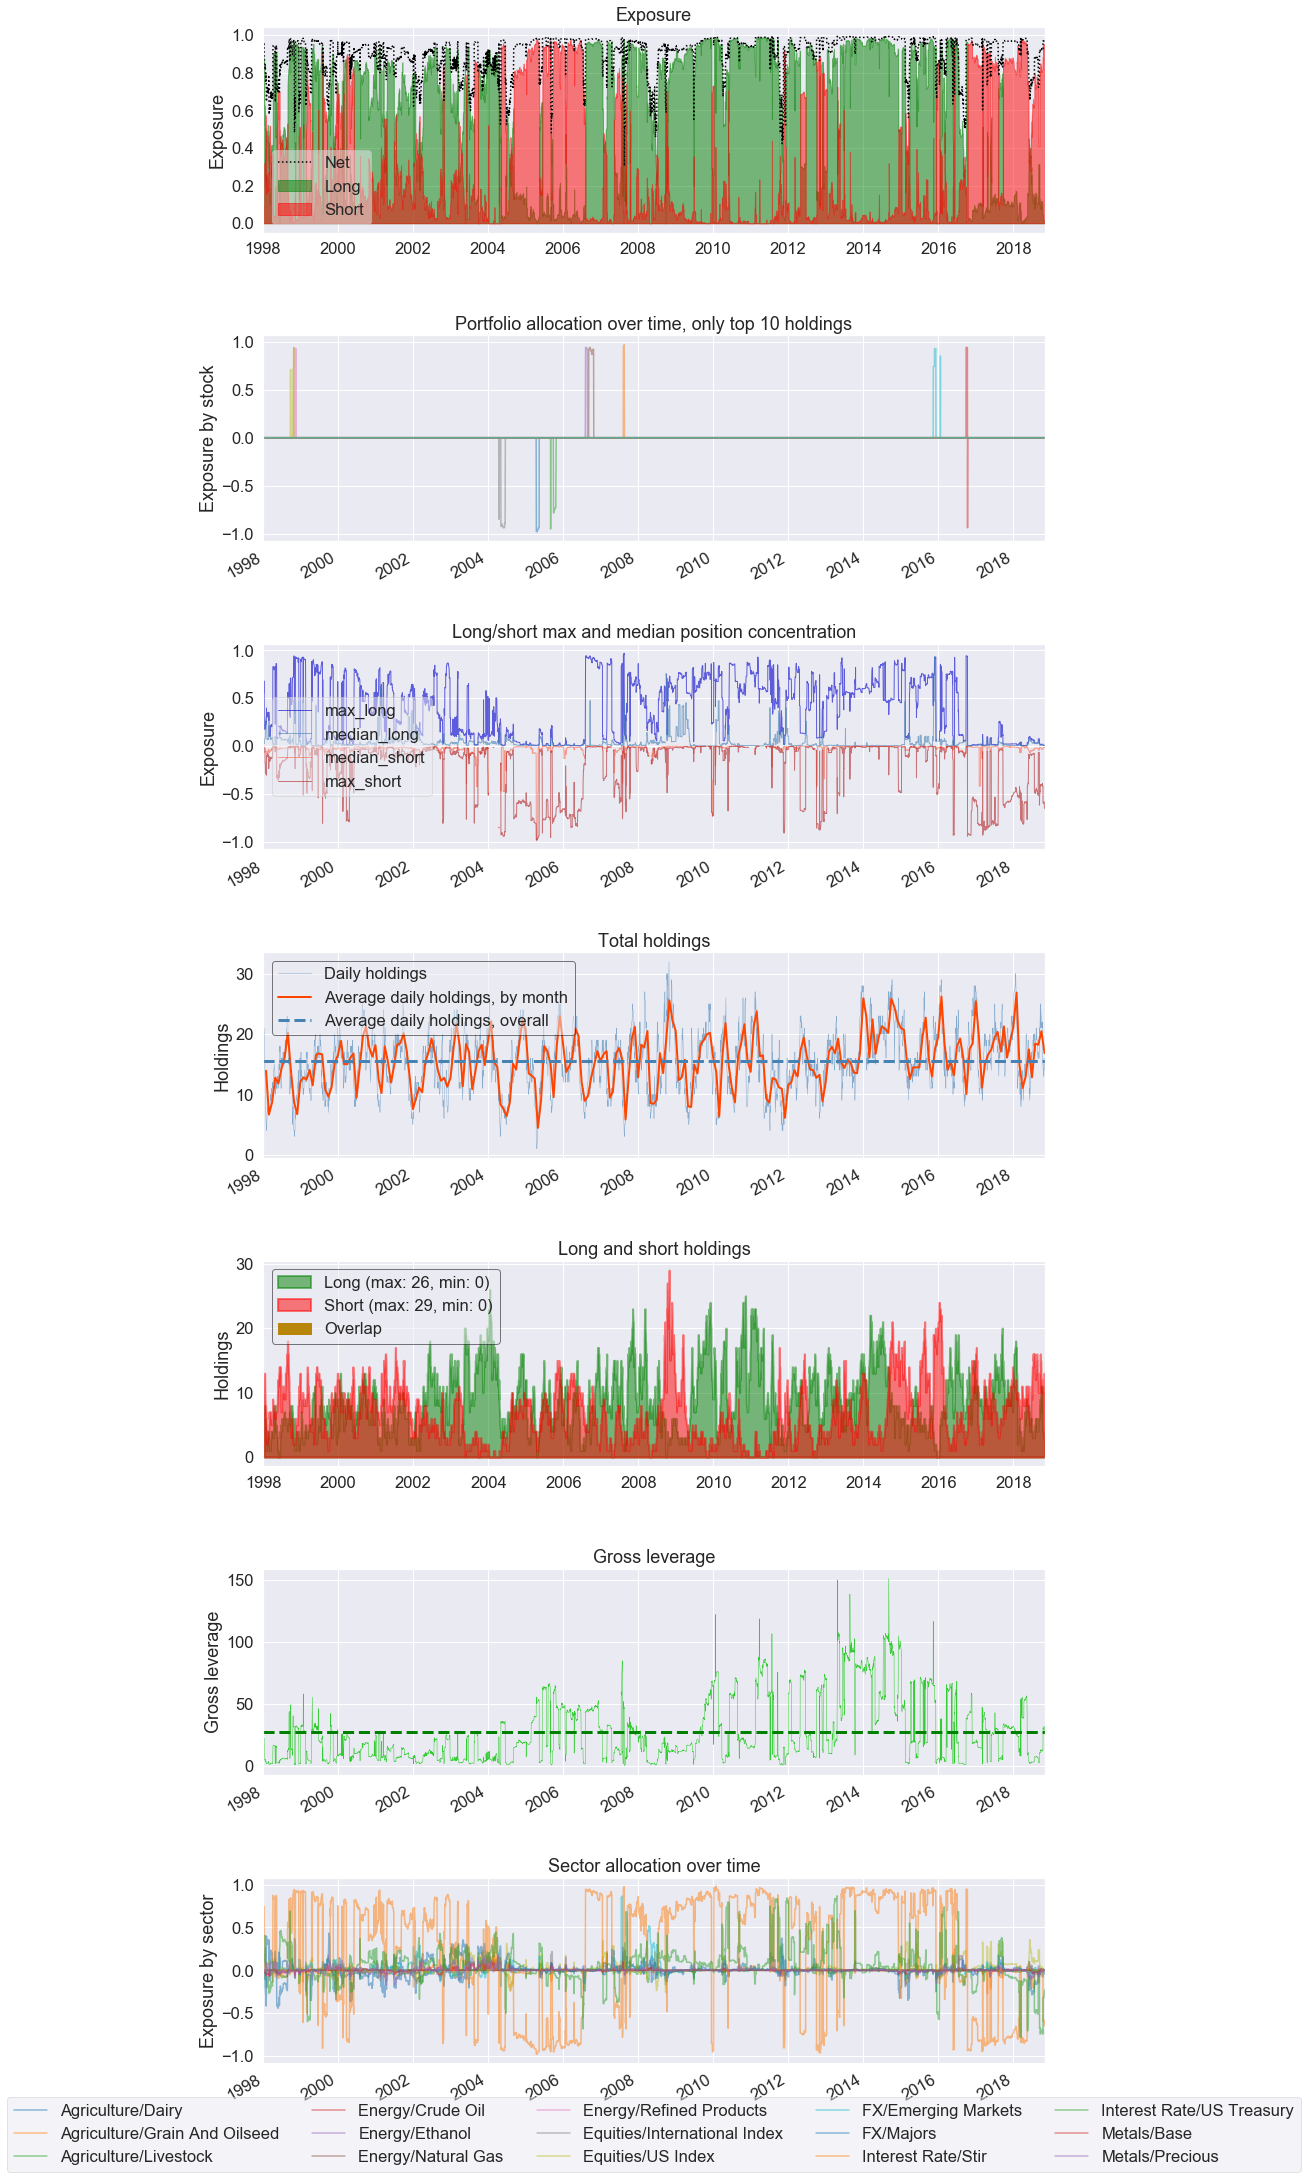

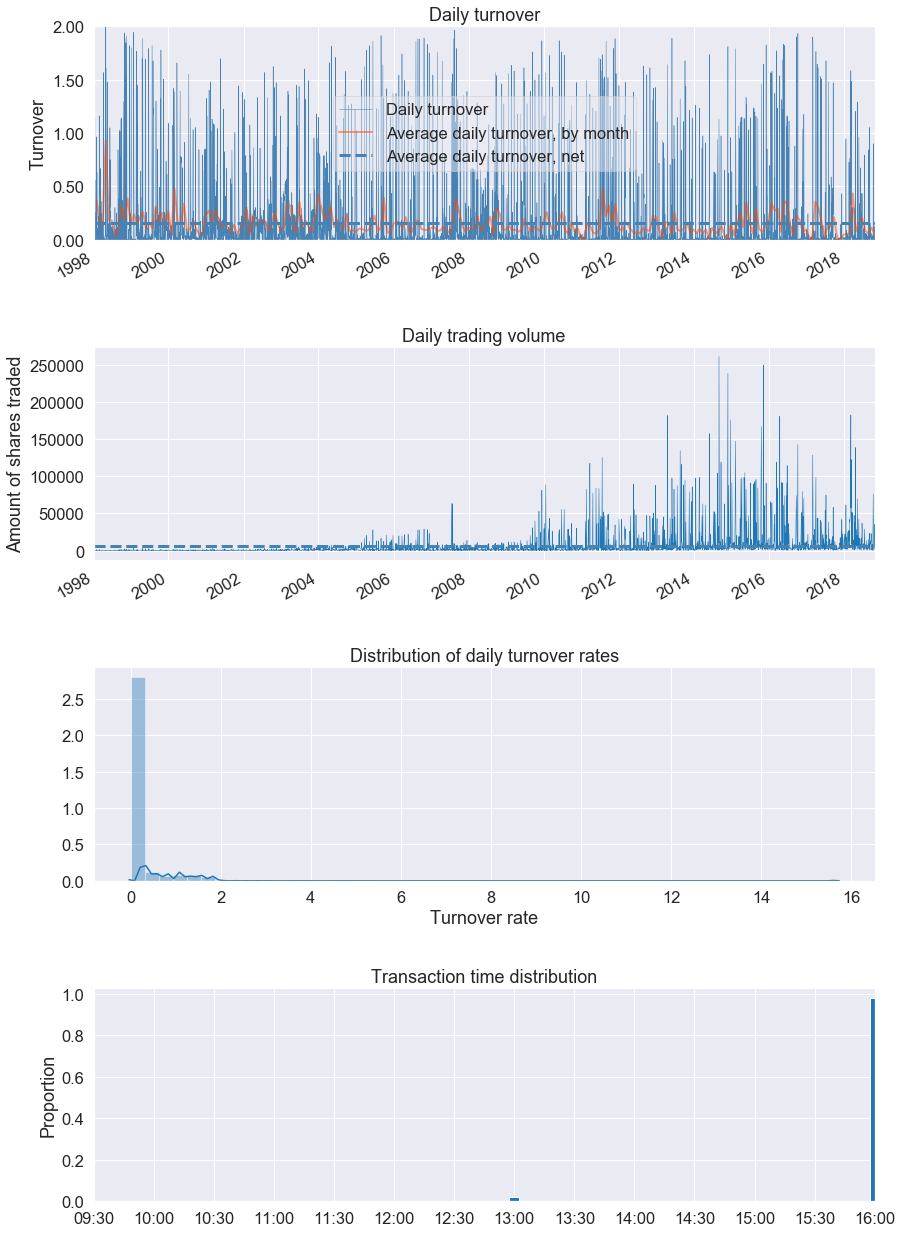

In [ ]:
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions_mod,
                          live_start_date=out_of_sample, round_trips=True, benchmark_rets=benchmark,
                          sector_mappings=sector_map, hide_positions=True)

# PnL by root symbol in dollars and % of total PnL

In [8]:
from pyfolio.round_trips import extract_round_trips, add_closing_transactions, apply_sector_mappings_to_round_trips
trips = add_closing_transactions(positions, transactions_mod)
trips['value'] = -trips.amount * trips.price
trips['root_symbol'] = trips['symbol'].apply(lambda x: x.root_symbol)
trips = trips.groupby(by='root_symbol').sum().sort_values(by='value', ascending=False)
trips['percent'] = round(trips.value.divide(abs(trips.value.sum())) * 100, 1)
del trips['amount']
del trips['price']
trips

,value,percent
root_symbol,,
YM,3047265.000,19.0
ES,2318762.500,14.5
EH,2158354.000,13.5
DA,2055000.000,12.8
BZ,1869200.000,11.7
CL,1467300.000,9.2
LN,1191744.000,7.4
HO,1126062.000,7.0
NK,1089533.650,6.8


In [19]:
#sanity check
trips.value.sum()

16021230.275000244

# Visualization of trades for given root symbol

In [20]:
root = 'ES'

In [21]:
from utils import future, continuous_future, history
import matplotlib.pyplot as plt
%matplotlib inline

def his(root, field='price'):
    return history(
                   assets=[continuous_future(root,
                                     offset=0,
                                     adjustment=None,
                                     roll_style='volume')],
                    end_dt=results.index[-1],
                    bar_count=len(results),
                    frequency='1d',
                    field=field,
                    data_frequency='daily'
                    )

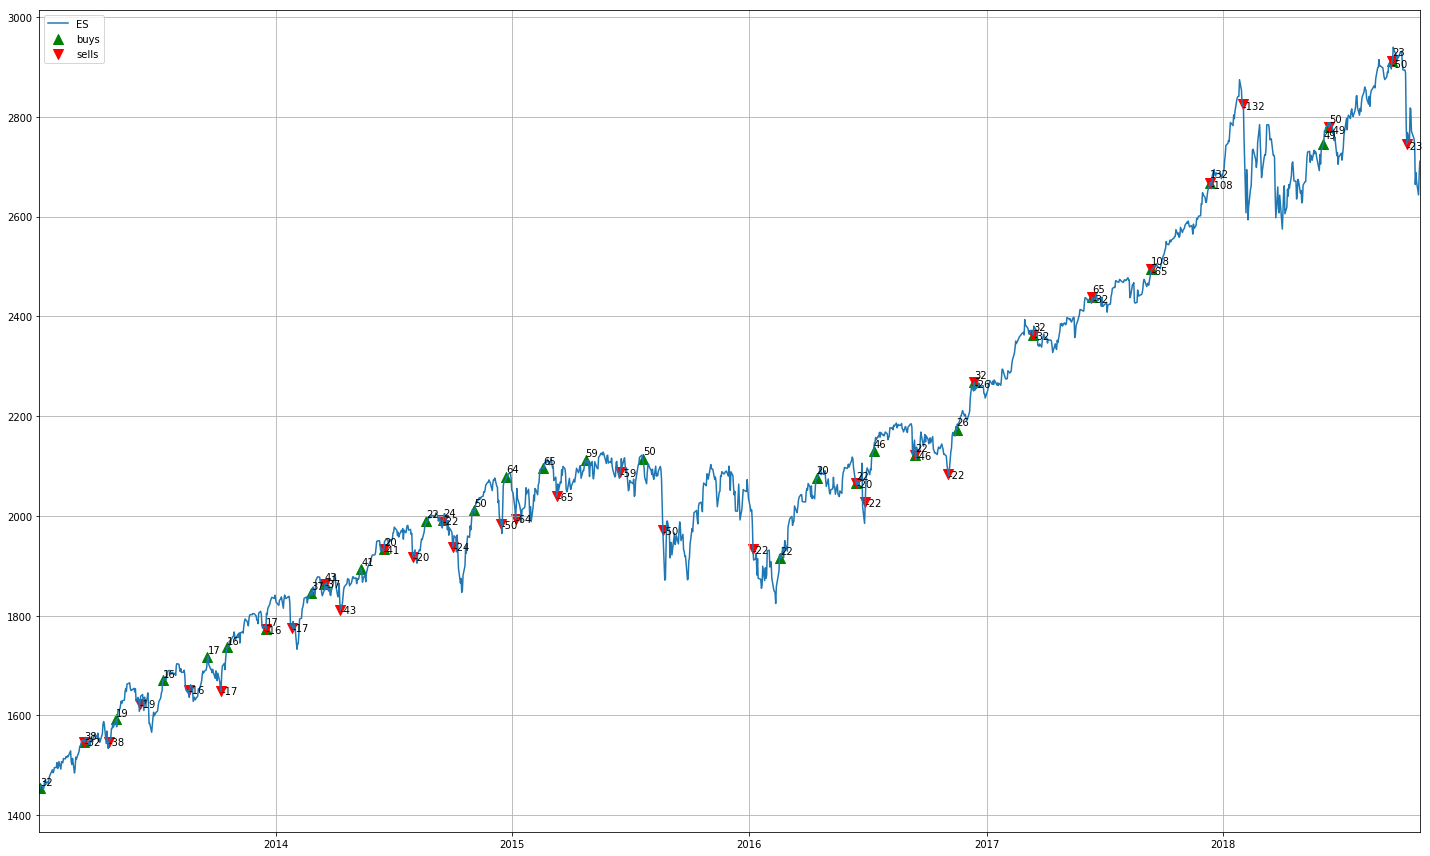

In [22]:
h = his(root)
h.columns=[root]

transactions['root_symbol'] = transactions['symbol'].apply(lambda x: x.root_symbol)
selected = transactions[transactions['root_symbol'] == root]
selected.index = selected.index.normalize()
buys = selected[selected['amount'] > 0]
sells = selected[selected['amount'] < 0]

plt.figure(figsize=(20,12))
plt.plot(h, label=root)
plt.scatter(buys.index, h.loc[buys.index], label='buys', color='green', s=100, marker="^")
plt.scatter(sells.index, h.loc[sells.index], label='sells', color='red', s=100, marker="v")
for i, txt in enumerate(buys['amount'].values):
    plt.annotate(txt, (buys.index[i], h.loc[buys.index[i]][root]*1.004))
for i, txt in enumerate(sells['amount'].values):
    plt.annotate(txt, (sells.index[i], h.loc[sells.index[i]][root]*.996))
plt.xlim(h.index.min(), h.index.max())
plt.legend(loc='best')
plt.grid()
#plt.rcParams['font.size'] = 15
plt.tight_layout()
plt.show();

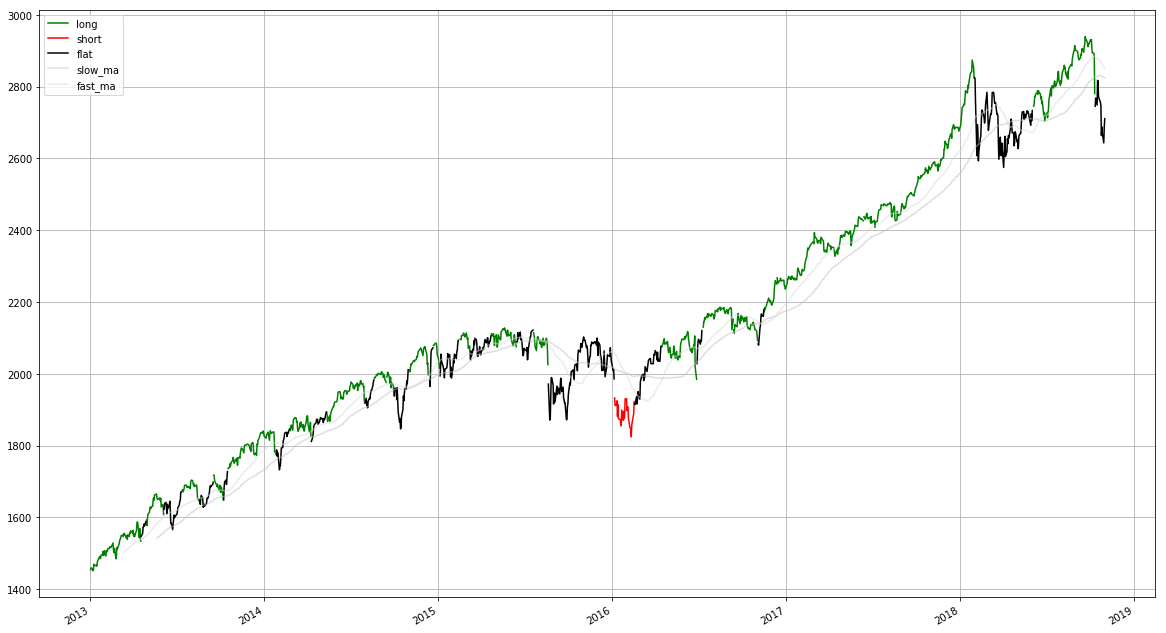

In [23]:
chart = h.copy()
chart = chart.join(selected.amount)
chart.amount = chart.amount.fillna(0)
chart.ix[0, 'amount']=0
chart['cumulative'] = chart['amount'].cumsum(skipna=False)

chart['long'] = chart['cumulative'] > 0
chart['short'] = chart['cumulative'] < 0
chart['flat'] = chart['cumulative'] == 0
chart['long'] = chart['long'] * chart[root]
chart['short'] = chart['short'] * chart[root]
chart['flat'] = chart['flat'] * chart[root]
chart['slow_ma'] = chart[root].rolling(100).mean()
chart['fast_ma'] = chart[root].rolling(50).mean()
chart = chart[['long', 'short', 'flat', 'slow_ma', 'fast_ma']].applymap(lambda x: x if x != 0 else np.nan)

chart['long'].plot(figsize=(20,12), legend=True, color='green')
chart['short'].plot(legend=True, color='red')
chart['flat'].plot(legend=True, color='black')
chart['slow_ma'].plot(legend=True, color='.75', alpha=0.5)
chart['fast_ma'].plot(legend=True, color='.85', alpha=0.5)
plt.grid();

In [24]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

full_h = his(root)
full_h.columns = ['close']
for field in ['open', 'high', 'low',]:
    full_h[field] = his(root, field)

In [25]:
exclude_rolls = False
if exclude_rolls:
    intersection = buys.index.intersection(sells.index)
    buys = buys.drop(intersection)
    sells = sells.drop(intersection)

In [26]:
trace1 = go.Candlestick(x=full_h.index, 
                        open=full_h.open,
                        high=full_h.high,
                        low=full_h.low,
                        close=full_h.close, 
                        name=root, 
                        hoverinfo='none',
                       )


params = {
    'mode': 'markers',
    'hoverinfo': 'text',
}
trace2 = go.Scatter(
    x=buys.index,
    y=buys['price'],
    name='Buys',
    text=list(buys['amount']),
    textposition='middle left',
    marker=dict(size=8,
                color='rgba(0, 0, 128, .9)'),
    **params,
)
trace3 = go.Scatter(
    x=sells.index,
    y=sells['price'],
    name='Sells',
    text=list(sells['amount']),
    textposition='middle right',
    marker=dict(size=8,
                color='rgba(255, 255, 0, .9)'),
    **params
)

layout = go.Layout(
    xaxis = dict(
        rangeslider = dict(
            visible = False
        )
    )
)
data = [trace1, trace2, trace3]
fig = go.Figure(data=data,layout=layout)

py.iplot(fig, filename='candlestick_chart')

In [27]:
transactions[transactions['root_symbol']==root]

,amount,commission,dt,order_id,price,sid,symbol,txn_dollars,root_symbol
2013-01-03 21:00:00+00:00,32,None,2013-01-03 21:00:00+00:00,03c599a465ef43faba54d5b2532d5fc6,1456.00,Future(9476 [ESH13]),Future(9476 [ESH13]),-2329600.0,ES
2013-03-12 20:00:00+00:00,-32,None,2013-03-12 20:00:00+00:00,432f2575bba44583a2e29945426d9f47,1556.75,Future(9476 [ESH13]),Future(9476 [ESH13]),2490800.0,ES
2013-03-12 20:00:00+00:00,38,None,2013-03-12 20:00:00+00:00,f40c3c9a6c3d4845bb8a5f741cbc8bbd,1551.50,Future(9597 [ESM13]),Future(9597 [ESM13]),-2947850.0,ES
2013-04-19 20:00:00+00:00,-38,None,2013-04-19 20:00:00+00:00,44e919eb613348b79e20b1fd9a2f33f2,1537.00,Future(9597 [ESM13]),Future(9597 [ESM13]),2920300.0,ES
2013-04-30 20:00:00+00:00,19,None,2013-04-30 20:00:00+00:00,f8e372fe9d2e4370b20d79315fae5882,1588.50,Future(9597 [ESM13]),Future(9597 [ESM13]),-1509075.0,ES
2013-06-06 20:00:00+00:00,-19,None,2013-06-06 20:00:00+00:00,fc27af02258242e5b60fbc1ba1e7cd54,1608.50,Future(9597 [ESM13]),Future(9597 [ESM13]),1528075.0,ES
2013-07-12 20:00:00+00:00,16,None,2013-07-12 20:00:00+00:00,e6f3c615d7d24d66bb9d8901f15b8b9d,1669.00,Future(9706 [ESU13]),Future(9706 [ESU13]),-1335200.0,ES
2013-08-20 20:00:00+00:00,-16,None,2013-08-20 20:00:00+00:00,ea86616a22d8449fa931176819988dd8,1644.25,Future(9706 [ESU13]),Future(9706 [ESU13]),1315400.0,ES
2013-09-18 20:00:00+00:00,17,None,2013-09-18 20:00:00+00:00,0a797c7fee31441a9c03bfdcd996f486,1699.25,Future(9809 [ESZ13]),Future(9809 [ESZ13]),-1444362.5,ES
2013-10-09 20:00:00+00:00,-17,None,2013-10-09 20:00:00+00:00,967444fb02a542b4a727484e72617bc9,1648.00,Future(9809 [ESZ13]),Future(9809 [ESZ13]),1400800.0,ES


In [28]:
t= transactions[transactions['root_symbol']==root]

In [29]:
t.loc['2015':'2018']

,amount,commission,dt,order_id,price,sid,symbol,txn_dollars,root_symbol
2015-01-06 21:00:00+00:00,-64,None,2015-01-06 21:00:00+00:00,abca03fd7b874ae1a08b54e461ec9316,2019.00,Future(13471 [ESH15]),Future(13471 [ESH15]),6460800.0,ES
2015-02-17 21:00:00+00:00,65,None,2015-02-17 21:00:00+00:00,7e4e1b5248e5436eab965af88214653e,2091.25,Future(13471 [ESH15]),Future(13471 [ESH15]),-6796562.5,ES
2015-03-11 20:00:00+00:00,-65,None,2015-03-11 20:00:00+00:00,937cc10e48f244c2a6e4a9dea2dc3d1e,2044.25,Future(13471 [ESH15]),Future(13471 [ESH15]),6643812.5,ES
2015-04-24 20:00:00+00:00,59,None,2015-04-24 20:00:00+00:00,a8879836c0a446b8800676544ee38b55,2107.50,Future(14278 [ESM15]),Future(14278 [ESM15]),-6217125.0,ES
2015-06-16 20:00:00+00:00,-59,None,2015-06-16 20:00:00+00:00,f168e0edff8e4a74a5bc12136eedde8c,2083.50,Future(14278 [ESM15]),Future(14278 [ESM15]),6146325.0,ES
2015-07-21 20:00:00+00:00,50,None,2015-07-21 20:00:00+00:00,c2a2e7c3638247ee977f81a82cf37f42,2121.25,Future(15086 [ESU15]),Future(15086 [ESU15]),-5303125.0,ES
2015-08-21 20:00:00+00:00,-50,None,2015-08-21 20:00:00+00:00,cbbb78b77f7b4473a4c84b2d59c1689d,2026.25,Future(15086 [ESU15]),Future(15086 [ESU15]),5065625.0,ES
2016-01-07 21:00:00+00:00,-22,None,2016-01-07 21:00:00+00:00,fc180cf313f547cc8b43ee6d2ae174de,1987.75,Future(16721 [ESH16]),Future(16721 [ESH16]),2186525.0,ES
2016-02-18 21:00:00+00:00,22,None,2016-02-18 21:00:00+00:00,3993a59eb44543b4bdfa7316caafee10,1922.75,Future(16721 [ESH16]),Future(16721 [ESH16]),-2115025.0,ES
2016-04-14 20:00:00+00:00,20,None,2016-04-14 20:00:00+00:00,8e85c56355e24f978a8572c806b12297,2076.25,Future(17483 [ESM16]),Future(17483 [ESM16]),-2076250.0,ES
